In [0]:
import pandas as pd 
import os
import re
from pyspark.sql.functions import col,when,sum,to_date,avg,corr
from pyspark.sql import functions as F
from pyspark.sql.types import decimal
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.errors import PySparkException

spark = SparkSession.builder \
    .appName("Silver_Urbanisation_Prospects") \
    .getOrCreate()


Joined_df = spark.sql(
    """
    select pop.Entity,pop.Year,income.Gini_coefficient,pop.Urban_population_percent_of_total,pop.`Rural_population_1950-2050_UN_World_Urbanization_Prospects_2018`,country.Countries_Continents from world_inequality_pretax_income income
    left join urban_rural_population pop
    on pop.Entity = income.Country
    and pop.Year = income.Year 
    left join countries country
    on country.Country = pop.Entity
   


    """
)

display(Joined_df)

'''
calculating the average for the Urban population (% of total) and Gini coefficient for each year in Silver_df, grouping the data and ordering the results by Year.
'''



#Gradual Urbanization Growth
'''
1.The percentage of the urban population has been steadily rising over the years.

2. The most significant increases are seen after 1980, reflecting a worldwide shift towards urban living.
'''
#Income Inequality Trends
'''
1. The Gini coefficient was fairly low (under 0.2) until the late 1970s.

2. After 1980, there’s a noticeable surge—income inequality rises sharply along with urban growth.

3. By 2020, the Gini coefficient climbs above 0.6, indicating widening income gaps.



'''





Entity,Year,Gini_coefficient,Urban_population_percent_of_total,Rural_population_1950-2050_UN_World_Urbanization_Prospects_2018,Countries_Continents
Cape Verde,1990,0.700339953532129,5.697686930537012E-6,191000,Africa
Cape Verde,1991,0.70034003711833,5.961818112747337E-6,192000,Africa
Cape Verde,1992,0.700339997886367,6.2259492949576625E-6,194000,Africa
Cape Verde,1993,0.70033995725742,6.527813503198034E-6,196000,Africa
Cape Verde,1994,0.70033995725742,6.829677711438405E-6,198000,Africa
Cape Verde,1995,0.700340030133411,7.169274945708824E-6,199000,Africa
Cape Verde,1996,0.700340077875971,7.471139153949195E-6,201000,Africa
Cape Verde,1997,0.700339975883871,7.810736388219613E-6,201000,Africa
Cape Verde,1998,0.700339962379694,8.112600596459984E-6,202000,Africa
Cape Verde,1999,0.700339965406492,8.452197830730403E-6,202000,Africa


In [0]:
# Cast columns to DoubleType
Joined_df = Joined_df.withColumn("Urban_population_percent_of_total", col("Urban_population_percent_of_total").cast("double")) \
                     .withColumn("Gini_coefficient", col("Gini_coefficient").cast("double"))

# Now calculate correlation
correlation = Joined_df.stat.corr("Urban_population_percent_of_total", "Gini_coefficient")
print(f"Correlation between Urban % and Gini: {correlation}")


#measure relationships between urbanization and inequality:
#To understand who benefits from urban development — and who is left behind.
#identify cities or regions where inequality may undermine stability and trust in institutions.

Correlation between Urban % and Gini: 0.10477892045454736


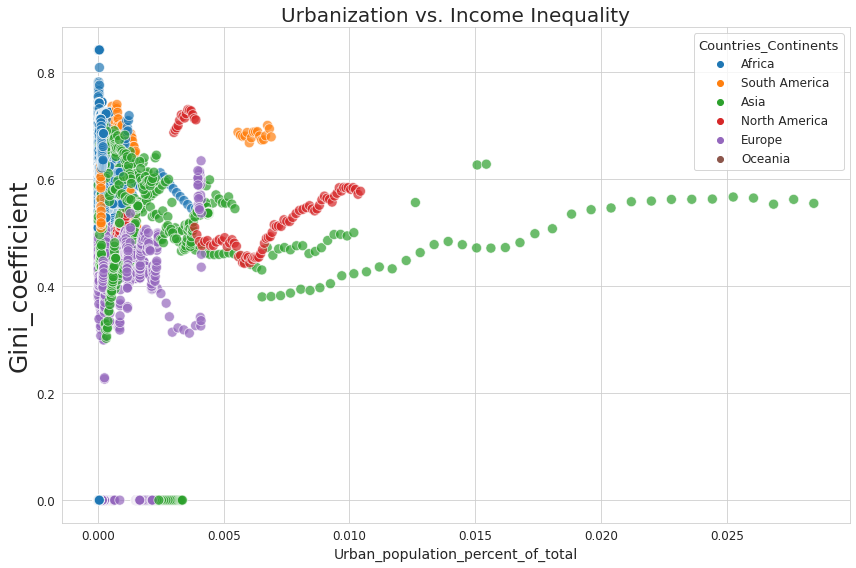

In [0]:
pandas_df = Joined_df.select(
    "Entity", "Countries_Continents", "Year", 
    "Urban_population_percent_of_total", 
    "Gini_coefficient"
).toPandas()
# Set figure size and style
plt.figure(figsize=(12, 8))  # Width x Height in inches
sns.set_style("whitegrid")   # Clean background
# Create scatter plot
sns.scatterplot(
    data=pandas_df, 
    x="Urban_population_percent_of_total", 
    y="Gini_coefficient", 
    hue="Countries_Continents",  
    alpha=0.7,         
    s=100             
)
# Customize title and labels
plt.title("Urbanization vs. Income Inequality", fontsize=20)
plt.xlabel("Urban_population_percent_of_total", fontsize=14)
plt.ylabel("Gini_coefficient", fontsize=25)
plt.legend(title="Countries_Continents", fontsize=12, title_fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Show the plot
plt.tight_layout()
plt.show()


'''Segmenting countries by continent and income level  helps reveal patterns of how
urbanization and inequality differ between continents (e.g., Africa vs. Europe)

1. many data points cluster at lower urbanization levels, suggests a concentration of income inequality in less urbanized regions. 2. the distribution varies across continents, showing regional disparities in how urbanization impacts economic inequality.

Possible Correlations

The data suggests that as urbanization picked up speed, income inequality also increased—especially post-1980.

More urbanization = possibly larger income disparities? This could be linked to economic changes like industrial growth, migration, and the concentration of wealth.
'''


In [0]:
try:
    # Perform the aggregation and ordering
    trend_df = Joined_df.groupBy("Year").agg(
        F.avg("Urban_population_percent_of_total").alias("Avg_Urban_Pop"),
        F.avg("Gini_coefficient").alias("Avg_Gini")
    ).orderBy("Year")

    # Display the resulting DataFrame
    display(trend_df)

except PySparkException as e:
    print(f"PySpark error occurred: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
finally:
    print("Aggregation and display operation completed.")


#Gradual Urbanization Growth
'''
1.The percentage of the urban population has been steadily rising over the years.

2. The most significant increases are seen after 1980, reflecting a worldwide shift towards urban living.
'''
#Income Inequality Trends
'''
1. The Gini coefficient was fairly low (under 0.2) until the late 1970s.

2. After 1980, there’s a noticeable surge—income inequality rises sharply along with urban growth.

3. By 2020, the Gini coefficient climbs above 0.6, indicating widening income gaps.



'''

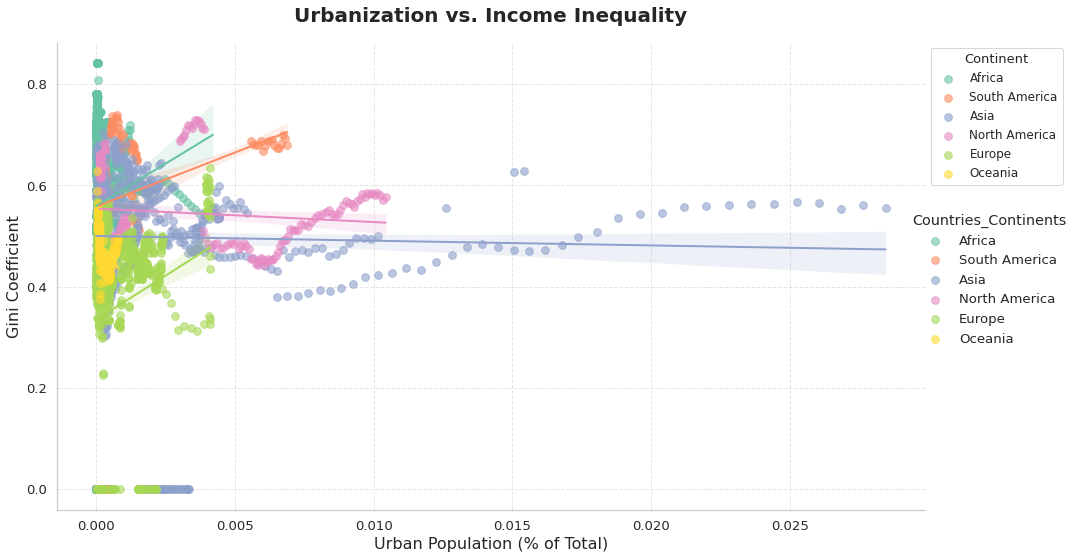

In [0]:

# Convert dataframe to Pandas
pandas_df = Joined_df.toPandas()

#  Ensure numeric columns
pandas_df["Urban_population_percent_of_total"] = pd.to_numeric(pandas_df["Urban_population_percent_of_total"], errors='coerce')
pandas_df["Gini_coefficient"] = pd.to_numeric(pandas_df["Gini_coefficient"], errors='coerce')

# Drop any rows with missing or invalid values
pandas_df_filtered = pandas_df.dropna(subset=["Urban_population_percent_of_total", "Gini_coefficient", "Countries_Continents"])

#  Plotting
sns.set(style="whitegrid", font_scale=1.2)

g = sns.lmplot(
    data=pandas_df_filtered,
    x="Urban_population_percent_of_total",
    y="Gini_coefficient",
    hue="Countries_Continents",              
    height=8,                               
    aspect=1.6,                              
    scatter_kws={'alpha': 0.6, 's': 60},     
    line_kws={'linewidth': 2},              
    palette="Set2"                           
)

g.set_titles("")
g.set_axis_labels("Urban Population (% of Total)", "Gini Coefficient", fontsize=16)
plt.title("Urbanization vs. Income Inequality", fontsize=20, weight='bold', pad=20)
plt.legend(title="Continent", fontsize=12, title_fontsize=13, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


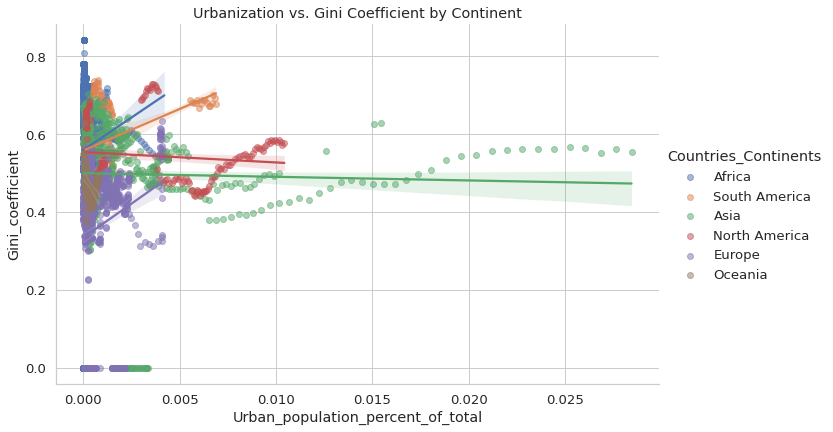

In [0]:
# Plot with hue by continent
sns.lmplot(
    data=pandas_df_filtered,
    x="Urban_population_percent_of_total",
    y="Gini_coefficient",
    hue="Countries_Continents",
    aspect=1.6,
    height=6,
    scatter_kws={'alpha':0.5}
)
plt.title("Urbanization vs. Gini Coefficient by Continent")
plt.grid(True)
plt.show()